# Examine data

This notebook is examining the expression data that will be used in the network analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import random
import numpy as np
from core_acc_modules import paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load expression data
pao1_compendium_filename = paths.PAO1_COMPENDIUM
pa14_compendium_filename = paths.PA14_COMPENDIUM

In [3]:
pao1_compendium = pd.read_csv(pao1_compendium_filename, sep="\t", header=0, index_col=0)
pa14_compendium = pd.read_csv(pa14_compendium_filename, sep="\t", header=0, index_col=0)

## Visualize distribution of expression data

Text(0.5, 1.05, 'Random set of genes (PAO1)')

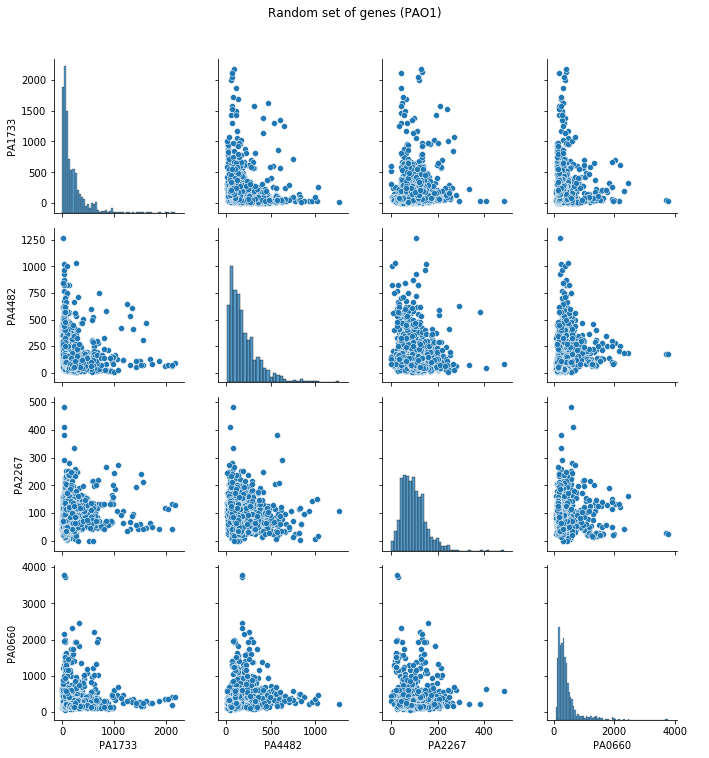

In [4]:
# Random PAO1 genes
random_pao1_ids = random.sample(list(pao1_compendium.columns), 4)
sns.pairplot(pao1_compendium[random_pao1_ids])
plt.suptitle("Random set of genes (PAO1)", y=1.05)

In [5]:
# Try removing outlier samples
pao1_compendium_tmp = pao1_compendium[pao1_compendium["PA1337"] < 200]

Text(0.5, 1.05, 'Co-operonic set of genes (PAO1)')

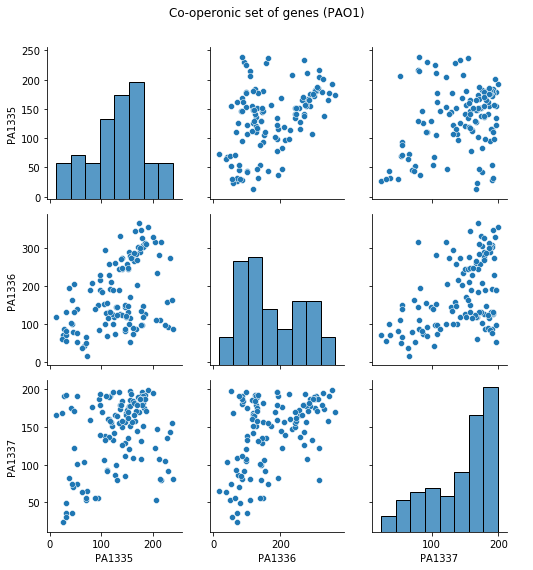

In [6]:
# Co-operonic PAO1 genes
# pao1_co_operonic_ids = ["PA0001", "PA0002", "PA0003", "PA0004"]
# pao1_co_operonic_ids = ["PA0054","PA0055", "PA0056"]
pao1_co_operonic_ids = ["PA1335", "PA1336", "PA1337"]
sns.pairplot(pao1_compendium_tmp[pao1_co_operonic_ids])
plt.suptitle("Co-operonic set of genes (PAO1)", y=1.05)

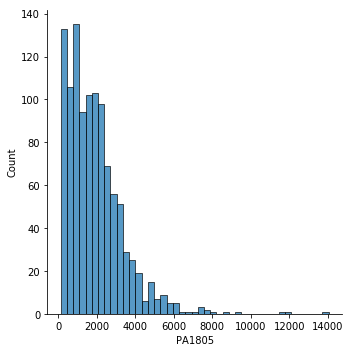

In [7]:
# Houskeeping PAO1 gene that we would expect a consistently high expression across samples
# which doesn't have that peak at 0
sns.displot(pao1_compendium["PA1805"])

Text(0.5, 1.05, 'Random set of genes (PA14)')

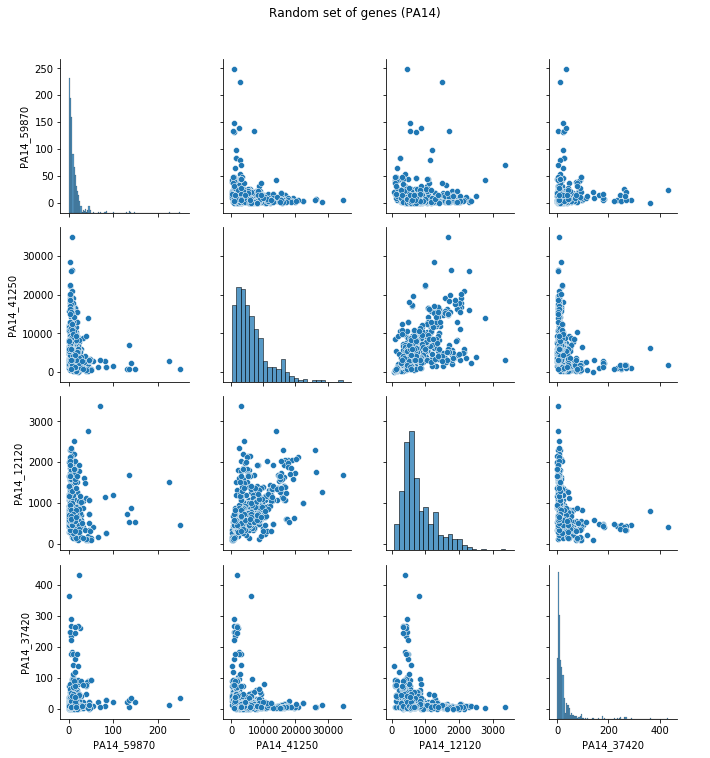

In [8]:
# Random PA14 gene
random_pa14_ids = random.sample(list(pa14_compendium.columns), 4)
sns.pairplot(pa14_compendium[random_pa14_ids])
plt.suptitle("Random set of genes (PA14)", y=1.05)

**Observations:**
These pair plots tell us what the distribution of the genes look like in our compendia. Overall it looks like genes tend to have a heavy right tail and some genes have a spike at 0 while others don't. As expected, our example housekeeping gene doesn't have this peak since this is a gene that tends to be highly active across all samples (i.e. there is no 0 spike).

These pair plots also give us a rough sense for how correlated genes are. We would expect co-operonic genes to be more highly correlated compared to a random set of genes, which we do see. Some correlations appear not as strong due to the differences in scales between genes - something to consider when we are looking at correlations between genes.